In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [5]:
boston_df['PRICE'] = boston.target
print(boston_df.head(3))
print(boston_df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
(506, 14)


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


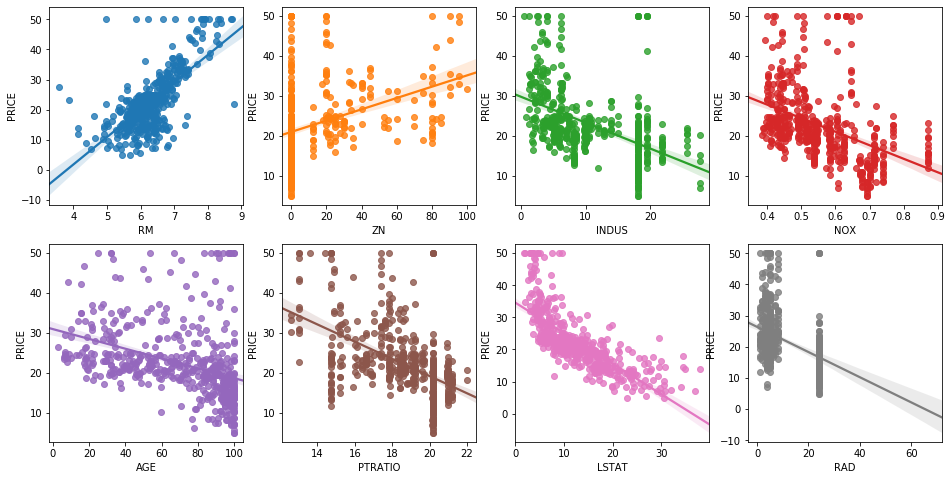

In [11]:
fig, ax = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=ax[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('R2: {:.3f}'.format(r2_score(y_test, pred)))

MSE: 21.953, RMSE: 4.685
R2: 0.745


In [22]:
print(np.round(lr.intercept_, 3))
print(np.round(lr.coef_, 1))

37.013
[ -0.1   0.    0.    3.3 -19.7   3.6   0.   -1.5   0.3  -0.   -0.9   0.
  -0.6]


In [24]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns)
coeff

CRIM       -0.1
ZN          0.0
INDUS       0.0
CHAS        3.3
NOX       -19.7
RM          3.6
AGE         0.0
DIS        -1.5
RAD         0.3
TAX        -0.0
PTRATIO    -0.9
B           0.0
LSTAT      -0.6
dtype: float64

In [26]:
coeff.sort_values(ascending=False)

RM          3.6
CHAS        3.3
RAD         0.3
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.5
NOX       -19.7
dtype: float64

In [27]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5) 
#Scores have a negative sign(-) from C.V.
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5-Fold Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5-Fold RMSE scores: ', np.round(rmse_scores,2))
print('5-Fold AVG RMSE scores: ', np.round(avg_rmse,2))

5-Fold Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5-Fold RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5-Fold AVG RMSE scores:  5.83


In [31]:
lr1 = LinearRegression()

neg_mse_scores = cross_val_score(lr1, X, y, scoring='neg_mean_squared_error', cv=5) 
#Scores have a negative sign(-) from C.V.
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5-Fold Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5-Fold RMSE scores: ', np.round(rmse_scores,2))
print('5-Fold AVG RMSE scores: ', np.round(avg_rmse,2))

5-Fold Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5-Fold RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5-Fold AVG RMSE scores:  5.83
